<a href="https://colab.research.google.com/github/avkornaev/Fast_AI_course/blob/main/XRayImagesAnalysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [45]:
#hide
!pip install -Uqq fastbook
#!git clone 'https://github.com/avkornaev/Fast_AI_course'
#!wget <ENTER URL> Download dataset from the web with

Connect to Google disk.

In [46]:
# from google.colab import drive
# drive.mount('/content/drive')

Import libraries. Connect to Google disk.

In [47]:
import fastbook
#fastbook.setup_book() #an alternative to drive.mount with gdrive path instead of drive path 
import numpy as np
import pandas as pd
from fastbook import *
from fastai.data.all import *
from fastai.vision.all import *
from fastai.vision.widgets import *

Path.


In [48]:
dataPath = Path('G:\Covid_detection_Kaggle_summer_2021')
imdsFolder = 'images'
#root_dir = dataPath
#base_dir = root_dir
#print(os.getcwd()) # current directory

In [49]:
print(os.getcwd()) # current directory

C:\Users\rusak


Settings.

In [50]:
initImSize = 1024
reqImSize = 224
cropRatio = reqImSize/initImSize
NoOfImds = 5000 # desired number or 'all'
NoOfDispImds = 4 # number of displayed images
batchSize = 8

Create list of classes.

In [51]:
classes = ['0 - Negative','1 - Typical','2 - Indeterminate','3 - Atypical']
n = len(classes)
# print(os.getcwd()) # current directory
# print(os.listdir('/content')) # and it's content

In [52]:
import json
with open(dataPath/"targets.json", "r") as f:
    targets = json.load(f)
#print(targets)

Check an image information.

In [53]:
image_id = '000a312787f2'
print('study level (class number): ', targets[image_id]['study_level'])
print('image level (bounding boxes): ', targets[image_id]['image_level'])
print('metadata (additional info from the DICOM image file): ', targets[image_id]['metadata'])

study level (class number):  1
image level (bounding boxes):  {'boxes': [[0.18545309210526317, 0.16698117832568807, 0.42667880169172934, 0.7166666485091744], [0.5277049060150376, 0.16949692660550458, 0.7849092340225564, 0.6745283027522936]], 'labels': [1, 1], 'image_id': '000a312787f2', 'iscrowd': [0, 0], 'area': [6653.2506748157, 6517.674527234884]}
metadata (additional info from the DICOM image file):  [0.1976, 0.35119999999999996, 0.5, -0.44066666666666665, -0.16366666666666668, 0.5, 0.0, 0.0, -0.75, -0.5, -0.5, -0.4166666666666667]


Create data frame.

In [54]:
targetsDFa = pd.DataFrame(targets) # auxiliary dataFrame
targetsDF_init = np.array([list(targetsDFa.columns+'.png'), list(targetsDFa.loc['study_level'].values)])
targetsDF_init = pd.DataFrame(targetsDF_init.T, columns = ['file_name', 'label'])
num = np.random.choice(targetsDF_init.shape[0], targetsDF_init.shape[0], replace = False)
targetsDF_init = targetsDF_init.iloc[num]

In [55]:
targetsDF_init.label.value_counts()

1    3005
0    1735
2    1108
3     483
Name: label, dtype: int64

In [56]:
if NoOfImds != 'all':
    targetsDF = targetsDF_init.iloc[:NoOfImds]
    targetsDF_test = targetsDF_init.iloc[NoOfImds:]
ind = targetsDF[targetsDF_init.label=='2'].index
targetsDF = targetsDF.drop(axis = 0, index = ind)
targetsDF = targetsDF.append(targetsDF_init.loc[ind[0]])


<ipython-input-56-705cc26e4207>:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  ind = targetsDF[targetsDF_init.label=='2'].index


In [57]:
targetsDF.label.value_counts()

1    2359
0    1367
3     389
2       1
Name: label, dtype: int64

In [58]:
targetsDF_test.label.value_counts()

1    646
0    368
2    223
3     94
Name: label, dtype: int64

In [59]:
targetsDF.values.shape

(4116, 2)

In [60]:
targetsDF.head()

,file_name,label
5554,7749cddd0a17.png,1
3315,b2e0f472113b.png,1
1665,b866020311f0.png,3
5902,7064823e0cf2.png,3
6250,29f06cd1c344.png,1


Download and import of X-ray images.

https://docs.fast.ai/tutorial.medical_imaging.html#Download-and-import-of-X-ray-DICOM-files

https://docs.fast.ai/vision.data.html#ImageDataLoaders.from_df

https://colab.research.google.com/github/fastai/fastbook/blob/master/02_production.ipynb#scrollTo=vP4nen7N383Q

In [61]:
#images_source = untar_data()
# xray = ImageDataLoaders.from_df(targetsDF, path=dataPath/imdsFolder, valid_pct=0.2,
#                                 seed=42, fn_col=0, folder=None, 
#                                 suff='', label_col=1, label_delim=None, 
#                                 y_block=None, valid_col=None, item_tfms=Resize(224), 
#                                 batch_tfms=None, bs=64, val_bs=None, 
#                                 shuffle=None, device=None)
# item_tfms=Resize(128)

xray = DataBlock(
    blocks=(ImageBlock, CategoryBlock),
    get_x=lambda x: dataPath/imdsFolder/x[0],
    splitter=RandomSplitter(valid_pct=0.2, seed=42),
    get_y=lambda x: x[1],
    item_tfms=Resize(reqImSize))

In [62]:
#?DataBlock.dataloaders

In [63]:
dls = xray.dataloaders(targetsDF.values, path=dataPath/imdsFolder,
                       num_workers=0, verbose=None, bs=batchSize)

In [64]:
dls.vocab

['0', '1', '2', '3']

Check images (optional).

In [65]:
#hide
# fns = get_image_files(dataPath/imdsFolder)
# fns
#failed = verify_images(fns)
#print(failed)
#failed.map(Path.unlink);

Visualise a batch of images.

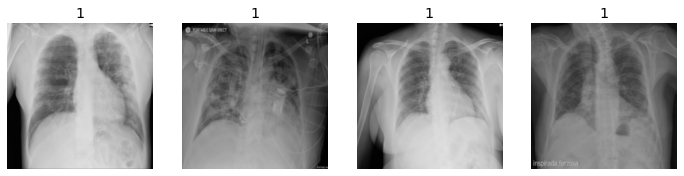

In [66]:
#dls = xray.dataloaders(targetsDF.values, num_workers=0)
dls.train.show_batch(max_n=4, nrows=1, unique=None) # uniqu=True allows to display only 1 image

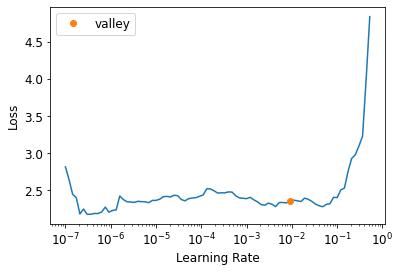

In [67]:
learn = cnn_learner(dls, resnet18, metrics=error_rate)
rate = learn.lr_find()

In [ ]:
targetsDF_copy = targetsDF.copy()
noOfepochs = 2
num_of_swap = 5
acc = np.zeros((num_of_swap,1))
for k in range(num_of_swap):
    dls = xray.dataloaders(targetsDF_copy.values, path=dataPath/imdsFolder, num_workers=0, verbose=None, bs=batchSize)
    cbs=[SaveModelCallback()]
    learn = cnn_learner(dls, resnet18, metrics=error_rate)
#     learn.fine_tune(noOfepochs, base_lr=rate.valley)
    learn.fine_tune(noOfepochs, base_lr=rate.valley, cbs=cbs)

    Y_pred = []
    for num in range(targetsDF.shape[0]):
        pred = learn.predict(targetsDF.values[num])        
        Y_pred.append(pred[0])
    
    Y_pred = pd.Series(Y_pred, index = targetsDF_copy.index)
    ind = targetsDF_copy[((targetsDF.label == '1')|(targetsDF.label == '3'))&(Y_pred!=targetsDF.label)].index
    targetsDF_copy.loc[ind, 'label'] = '2'
    ind = targetsDF_copy[((targetsDF.label == '1')|(targetsDF.label == '3'))&(Y_pred==targetsDF.label)&(targetsDF_copy.label == '2')].index
    targetsDF_copy.loc[ind, 'label'] = Y_pred.loc[ind]    
    acc[k] = accuracy(targetsDF.label.values, Y_pred)

epoch,train_loss,valid_loss,error_rate,time


In [ ]:
def accuracy(y, y_p):
    return(y==y_p).sum()/y.shape[0]

In [ ]:
acc

In [ ]:
plt.plot(np.arange(acc.shape[0]),acc)
plt.show()

In [ ]:
# targetsDF_copy = targetsDF.copy()
# Y_pred = pd.Series(Y_pred, index = targetsDF_copy.index)
# targetsDF_copy.label[Y_pred !=targetsDF.label]
# ind = targetsDF_copy[((targetsDF.label == '1')|(targetsDF.label == '3'))&(Y_pred!=targetsDF.label)].index
# targetsDF_copy.loc[ind, 'label'] = '2'
# ind = targetsDF_copy[((targetsDF.label == '1')|(targetsDF.label == '3'))&(Y_pred==targetsDF.label)&(targetsDF_copy.label == '2')].index
# targetsDF_copy.loc[ind, 'label'] = Y_pred.loc[list(ind)]
# targetsDF_copy, targetsDF

# dls = xray.dataloaders(targetsDF_copy.values, path=dataPath/imdsFolder,
#                        num_workers=0, verbose=True, bs=batchSize)

In [ ]:
Y_pred

In [ ]:
y_p = np.reshape(Y_pred.values, (Y_pred.shape[0],1))
yy = np.reshape(targetsDF_copy.label.values, (targetsDF_copy.shape[0],1))
y_tr = np.reshape(targetsDF.label.values, (targetsDF.shape[0],1))
pd.DataFrame(np.concatenate([y_tr, y_p, yy], axis =1), columns = ['y_true', 'y_predict', 'y_doubt'])

Crop and augment images.

In [ ]:
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix()

Check top losses.

In [ ]:
interp.plot_top_losses(NoOfDispImds, nrows=2)

In [ ]:
#xray = xray.new(item_tfms=Resize(128), batch_tfms=aug_transforms(mult=2))
#xray.show_batch(max_n=4, nrows=1, unique=True)

In [ ]:
learn.export()

Upload an image to check the ANN.

In [ ]:
uploader = widgets.FileUpload()
uploader

References

[1] https://docs.fast.ai/tutorial.medical_imaging.html#Download-and-import-of-X-ray-DICOM-files